# Capstone - Comparing ML models for single-label text classification (Part 3)

## Problem Statement, goals and success criteria 
(from Part2, here just as a reminder)

I will use multiple machine learning methods and compare how well they perform on a single-label text classification task.

The main goal is to reproduce part of my PhD work using state-of-the-art libraries in Python, and be able to access how this area evolved in the past 10 years.

I consider this work will be successful if I am able to reproduce the initial "related work" from my thesis, which at the time took about one year to complete, for this capstone project.  I expect results to be approximately the same as previously published results, and I will even apply some Machine Learning models that I did not use at the time.

## Mine: Correlate data and run statistical analysis

These three datasets are actively used for research in text categorisation, and they have a pre-defined train/test split to facilitate comparison of results.  This is the split that I will use throughout my project.

The first step is to read all the files and check that the number of documents in each category matches what was previously published.  Looking at the `xxx_counts` dataframes and comparing them with the tables in [this webpage](http://ana.cachopo.org/datasets-for-single-label-text-categorization), we can see that they match.

In [1]:
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def read_file(filename):
    return pd.read_csv("./datasets/"+filename, 
                       header=None, sep='\t', 
                       names=['label', 'text'])

ng20_train_df = read_file('ng20-train-all-terms.txt')
ng20_test_df = read_file('ng20-test-all-terms.txt')
r52_train_df = read_file('r52-train-all-terms.txt')
r52_test_df = read_file('r52-test-all-terms.txt')
r8_train_df = read_file('r8-train-all-terms.txt')
r8_test_df = read_file('r8-test-all-terms.txt')

all_dfs = [ng20_train_df, ng20_test_df, 
           r52_train_df, r52_test_df, 
           r8_train_df, r8_test_df]

all_names = ["ng20_train_df", "ng20_test_df", 
             "r52_train_df", "r52_test_df", 
             "r8_train_df", "r8_test_df"]

for (df,name) in zip(all_dfs, all_names):
    print(name, "(#rows, #columns):", df.shape)
    print(df.head(1))

ng20_train_df (#rows, #columns): (11293, 2)
         label                                               text
0  alt.atheism  alt atheism faq atheist resources archive name...
ng20_test_df (#rows, #columns): (7528, 2)
         label                                               text
0  alt.atheism  re about the bible quiz answers in article hea...
r52_train_df (#rows, #columns): (6532, 2)
   label                                               text
0  cocoa  bahia cocoa review showers continued throughou...
r52_test_df (#rows, #columns): (2568, 2)
   label                                               text
0  trade  asian exporters fear damage from u s japan rif...
r8_train_df (#rows, #columns): (5485, 2)
  label                                               text
0  earn  champion products ch approves stock split cham...
r8_test_df (#rows, #columns): (2189, 2)
   label                                               text
0  trade  asian exporters fear damage from u s japan rif...


In [3]:
def create_counts_df(df_train, df_test):
    counts_df = pd.concat([df_train["label"].value_counts(), 
                           df_test["label"].value_counts()], 
                          axis=1, keys=["# train docs", "# test docs"])
    counts_df["total # docs"] = counts_df.sum(axis=1)
    counts_df.loc['Total']= counts_df.sum()
    return counts_df

In [4]:
ng20_counts = create_counts_df(ng20_train_df, ng20_test_df)
ng20_counts

,# train docs,# test docs,total # docs
alt.atheism,480,319,799
comp.graphics,584,389,973
comp.os.ms-windows.misc,572,394,966
comp.sys.ibm.pc.hardware,590,392,982
comp.sys.mac.hardware,578,385,963
comp.windows.x,593,392,985
misc.forsale,585,390,975
rec.autos,594,395,989
rec.motorcycles,598,398,996
rec.sport.baseball,597,397,994


In [5]:
r52_counts = create_counts_df(r52_train_df, r52_test_df)
r52_counts

,# train docs,# test docs,total # docs
acq,1596,696,2292
alum,31,19,50
bop,22,9,31
carcass,6,5,11
cocoa,46,15,61
coffee,90,22,112
copper,31,13,44
cotton,15,9,24
cpi,54,17,71
cpu,3,1,4


In [6]:
r8_counts = create_counts_df(r8_train_df, r8_test_df)
r8_counts

,# train docs,# test docs,total # docs
acq,1596,696,2292
crude,253,121,374
earn,2840,1083,3923
grain,41,10,51
interest,190,81,271
money-fx,206,87,293
ship,108,36,144
trade,251,75,326
Total,5485,2189,7674


Use `CountVectorizer` to extract the words used in each training set.  It's interesting to see that the 20Newsgroups dataset has a much bigger vocabulary than either of the Reuters datasets.  Also, `r8` is a subset of `r52`, and it has a smaller vocabulary.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
def get_x_y(name, df_train, df_test):
    cvec = CountVectorizer(stop_words="english")
    cvec.fit(df_train["text"])
    print("Number of features for", name, len(cvec.get_feature_names()))
    X_train = pd.DataFrame(cvec.transform(df_train["text"]).todense(),
                           columns=cvec.get_feature_names())
    y_train = df_train["label"]
    X_test = pd.DataFrame(cvec.transform(df_test["text"]).todense(),
                          columns=cvec.get_feature_names())
    y_test = df_test["label"]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    return X_train, y_train, X_test, y_test

In [9]:
ng20_X_train, ng20_y_train, ng20_X_test, ng20_y_test = \
    get_x_y("ng20", ng20_train_df, ng20_test_df)

Number of features for ng20 73375
(11293, 73375)
(11293,)
(7528, 73375)
(7528,)


In [10]:
r52_X_train, r52_y_train, r52_X_test, r52_y_test = \
    get_x_y("r52", r52_train_df, r52_test_df)

Number of features for r52 21969
(6532, 21969)
(6532,)
(2568, 21969)
(2568,)


In [11]:
r8_X_train, r8_y_train, r8_X_test, r8_y_test = \
    get_x_y("r8", r8_train_df, r8_test_df)

Number of features for r8 19679
(5485, 19679)
(5485,)
(2189, 19679)
(2189,)


## Refine: Plot data with visual analysis

Bonus: Use 2 or more dataviz tools
Visualize your model using two or more of the data-viz tools we've covered in class

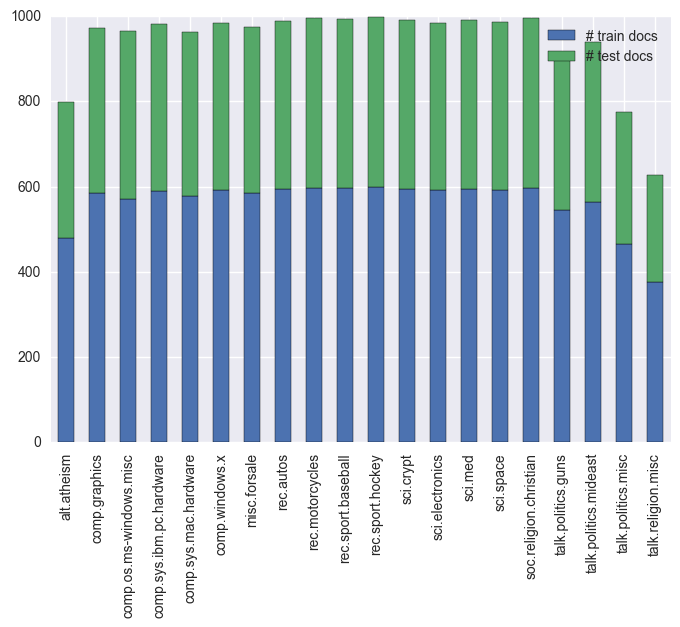

In [12]:
# do not plot totals (last column, last row in counts dataframes)
ng20_counts.iloc[:-1,:-1].plot.bar(stacked=True)

The number of train and test documents is approximately ballanced for all the classes in the `ng20` dataset.  Also, there's the usual 2/3 1/3 train/test split.

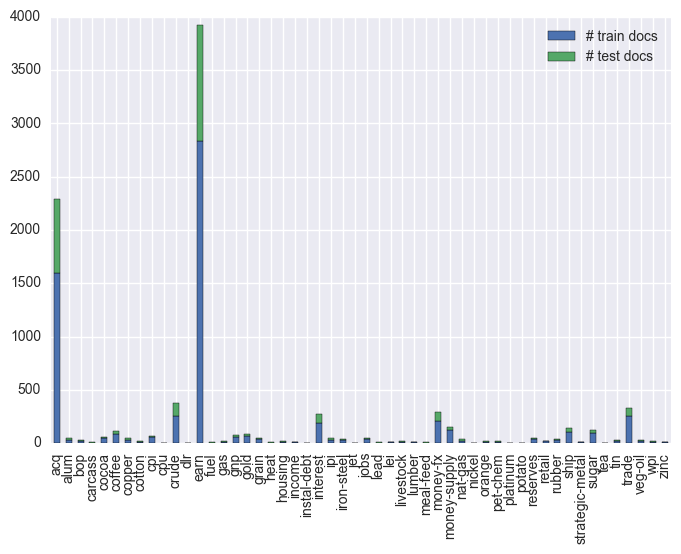

In [13]:
r52_counts.iloc[:-1,:-1].plot.bar(stacked=True)

The class distribution for the documents in the Reuters  dataset is very skewed, with the two most frequent classes containing approximately 70% of all the documents.  Also, even within each class, there's nolonger the usual 2/3 1/3 train/test split.

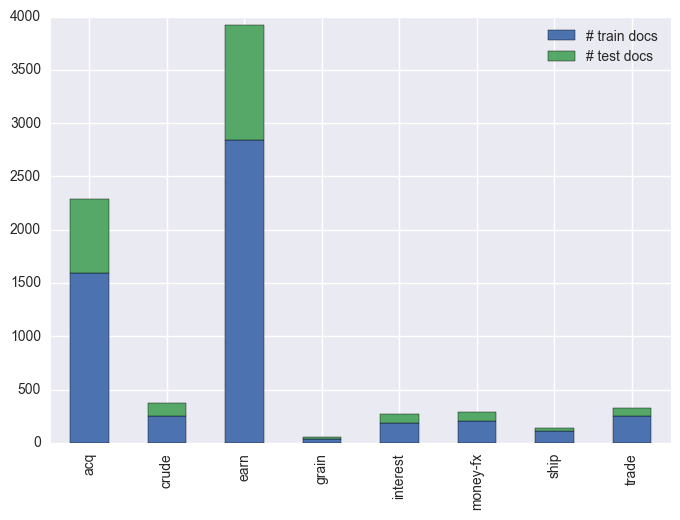

In [14]:
r8_counts.iloc[:-1,:-1].plot.bar(stacked=True)

Even considering only the 8 most frequent classes, the two most frequent classes in this dataset now account for approximately 80% of all the documents.   Also, even within each class, there's nolonger the usual 2/3 1/3 train/test split.

#### Create csv files with most common words in each training set to use with Tableau

In [15]:
ng20_word_counts = ng20_X_train.sum(axis=0)
ng20_word_counts.sort_values(ascending=False, inplace=True)
ng20_word_counts[:50].to_csv("./datasets/ng20_most_common_words.csv")

In [16]:
r52_word_counts = r52_X_train.sum(axis=0)
r52_word_counts.sort_values(ascending=False, inplace=True)
r52_word_counts[:50].to_csv("./datasets/r52_most_common_words.csv")

In [17]:
r8_word_counts = r8_X_train.sum(axis=0)
r8_word_counts.sort_values(ascending=False, inplace=True)
r8_word_counts[:50].to_csv("./datasets/r8_most_common_words.csv")

#### Create word cloud in Tableau for each dataset

From a csv that is a two-column table with a list of the unique words in the first column and their frequencies in the second column:

1. Drag [Words] to the Text Control of the Marks Shelf
2. Drag [Word Count] to the Size Control of the Marks Shelf
3. Change the Marks Type from Automatic to Text
4. To color the Word Cloud, drag [Word Count] to the Colors Control of the Marks Shelf

![png](./ng20.png)

![png](./r52.png)

![png](./r8.png)

## Model: Run model on data 

I am using the standard train and test splits for these datasets.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
models = (("dummy", DummyClassifier(strategy="most_frequent")),
          ("KNN", KNeighborsClassifier(n_neighbors=10)),
          ("LR", LogisticRegression()),
          ("DT", DecisionTreeClassifier()),
          ("SVM", SVC()),
          ("RF", RandomForestClassifier()),
          ("ET", ExtraTreesClassifier()))

tvec = TfidfVectorizer(stop_words='english',
                       sublinear_tf=True,
                       max_df=0.5,
                       max_features=1000)

def get_x_y(name, df_train, df_test, vect):
    cvec = vect
    cvec.fit(df_train["text"])
    X_train = pd.DataFrame(cvec.transform(df_train["text"]).todense(),
                           columns=cvec.get_feature_names())
    y_train = df_train["label"]
    X_test = pd.DataFrame(cvec.transform(df_test["text"]).todense(),
                          columns=cvec.get_feature_names())
    y_test = df_test["label"]
    return X_train, y_train, X_test, y_test

In [21]:
ng20_X_train, ng20_y_train, ng20_X_test, ng20_y_test = \
    get_x_y("ng20", ng20_train_df, ng20_test_df, tvec)

In [22]:
r52_X_train, r52_y_train, r52_X_test, r52_y_test = \
    get_x_y("r52", r52_train_df, r52_test_df, tvec)

In [23]:
r8_X_train, r8_y_train, r8_X_test, r8_y_test = \
    get_x_y("r8", r8_train_df, r8_test_df, tvec)

In [24]:
datasets = (("ng20", ng20_X_train, ng20_y_train, ng20_X_test, ng20_y_test), 
            ("r52", r52_X_train, r52_y_train, r52_X_test, r52_y_test),
            ("r8", r8_X_train, r8_y_train, r8_X_test, r8_y_test))

results = []
for dataset in datasets:
    print("------------------", dataset[0], "------------------")
    for (model_name, model) in models:
        print(model)
        model.fit(dataset[1], dataset[2])
        y_pred = model.predict(dataset[3])
        score = accuracy_score(dataset[4], y_pred)
        print("----- Accuracy:", score)
        results.append([dataset[0], model_name, score])

------------------ ng20 ------------------
DummyClassifier(constant=None, random_state=None, strategy=u'most_frequent')
----- Accuracy: 0.0530021253985
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
----- Accuracy: 0.279888416578
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----- Accuracy: 0.700584484591
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
----- Accuracy: 0.50624335813
SVC(C=1.0, cac

In [25]:
res_df = pd.DataFrame(results, columns=["dataset", "model", "accuracy"])
res_df

,dataset,model,accuracy
0,ng20,dummy,0.053002
1,ng20,KNN,0.279888
2,ng20,LR,0.700584
3,ng20,DT,0.506243
4,ng20,SVM,0.053002
5,ng20,RF,0.598698
6,ng20,ET,0.611716
7,r52,dummy,0.421729
8,r52,KNN,0.901869
9,r52,LR,0.894470


In [26]:
res_pivot = pd.pivot_table(res_df, index=["model"], columns=["dataset"], values=["accuracy"])
res_pivot

accuracy                    
dataset      ng20       r52        r8
model                                
DT       0.506243  0.838785  0.910918
ET       0.611716  0.873832  0.940155
KNN      0.279888  0.901869  0.952947
LR       0.700584  0.894470  0.964367
RF       0.598698  0.865654  0.935587
SVM      0.053002  0.421729  0.494746
dummy    0.053002  0.421729  0.494746

## Present: Summarise approach and initial results; describe successes, setbacks, and lessons learned

In part 3 of this project I was able to load and pre-process the three datasets that I will use for my work, and it all went as expected.

The results of my initial analisys agree with what was previously published regarding the number of documents per class, both for training and test sets.  I also created a "word cloud" with the 50 most common words for each dataset.  As expected, most of the words in r52 and r8 are common to both word clouds, given that r8 is a subset of r52.

Then I ran some models on all datasets and collected some results.  The DummyClassifier gets exactly the same as previously published, but other models get different results.  This is because feature selection was the same for all datasets, not optimised for each one individually.

Now I need to work on optimising feature selection for each dataset and also on parameter tuning for each model/dataset pair, so that I can properly compare my results with what has been previously published.

From this initial running of the models I learned that they will take some time to run in my machine, so I need to be prepared for that and plan in advance.  Also, it is a good idea to persistently store intermediate results, so that I don't need to run everything from scratch every time.

## Blog post summary

Blog post here:

https://acardocacho.github.io/capstone-part3/